In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from skimage import io, feature, color
from skimage.filters import sobel
%matplotlib inline

(400L, 400L)


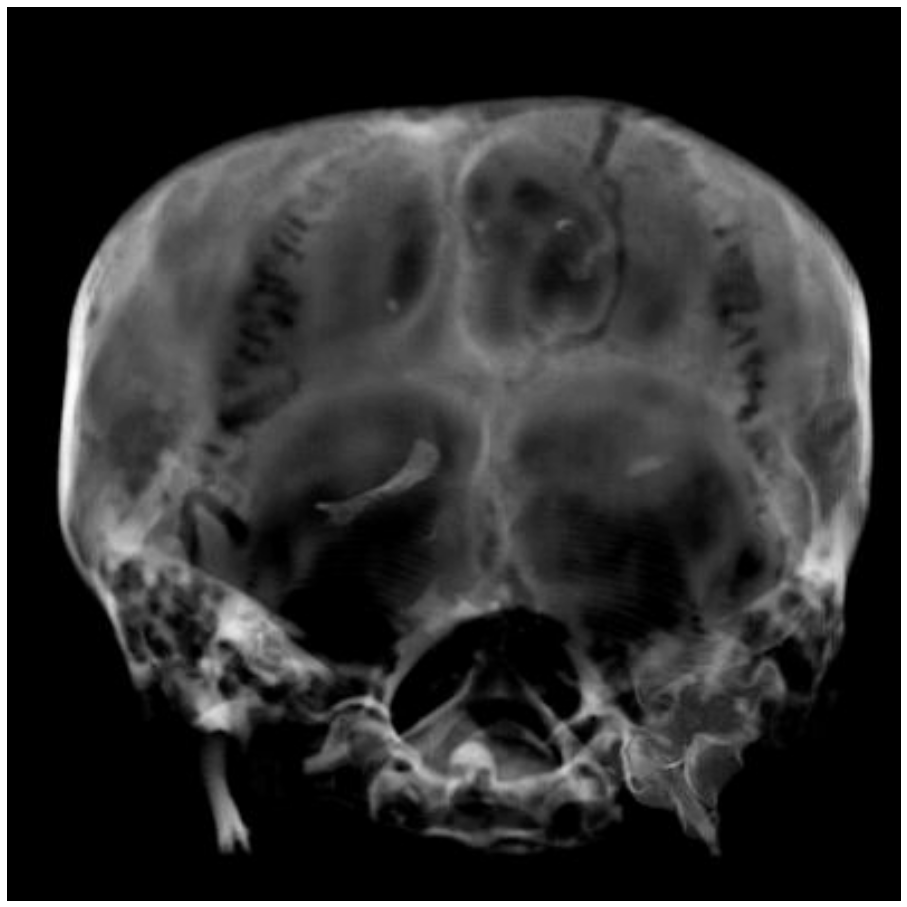

In [2]:
# input image - cat scan of King Tut

# t=io.imread('http://www.two-views.com/images/Tut%20bone%20frag.jpg') 
# can't seem to open it directly from url http://www.two-views.com/images/Tut%20bone%20frag.jpg

t=io.imread('Tut.jpg')  
tut = color.rgb2gray(t) 


print tut.shape

fig = plt.figure(figsize=(16,16))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks([])
ax.set_yticks([])

plt.imshow(tut, cmap='gray')
plt.show()


(100L, 100L)


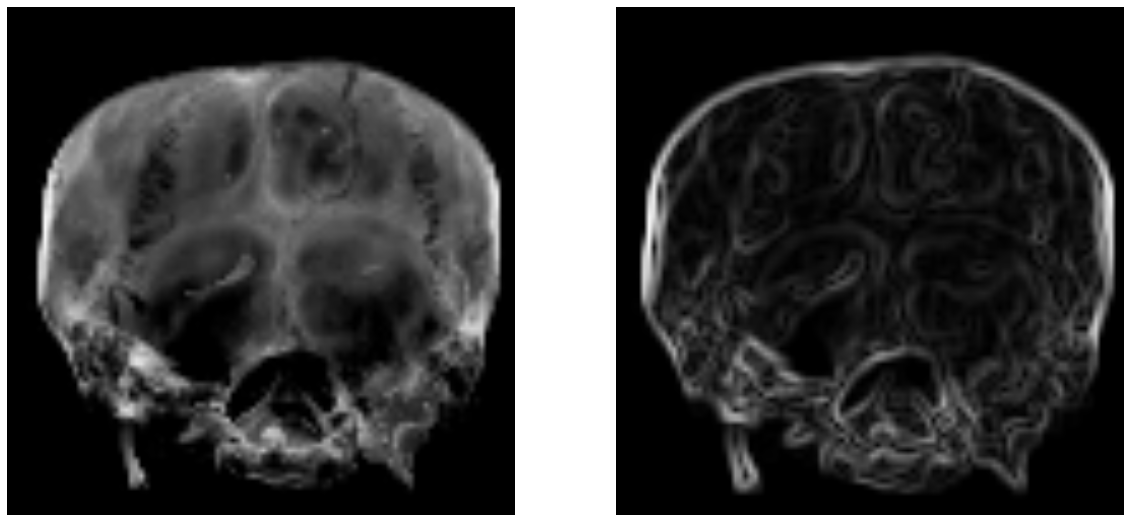

In [3]:
# reducing resolution by a factor of 4 - simulates high density seismic acquisition

tut_r1 = tut[::4,::4]
#edges_r1 = feature.canny(tut_r1)
edges_r1 = sobel(tut_r1)

print tut_r1.shape

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_r1, cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_r1, cmap='gray')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()



(100L, 100L)


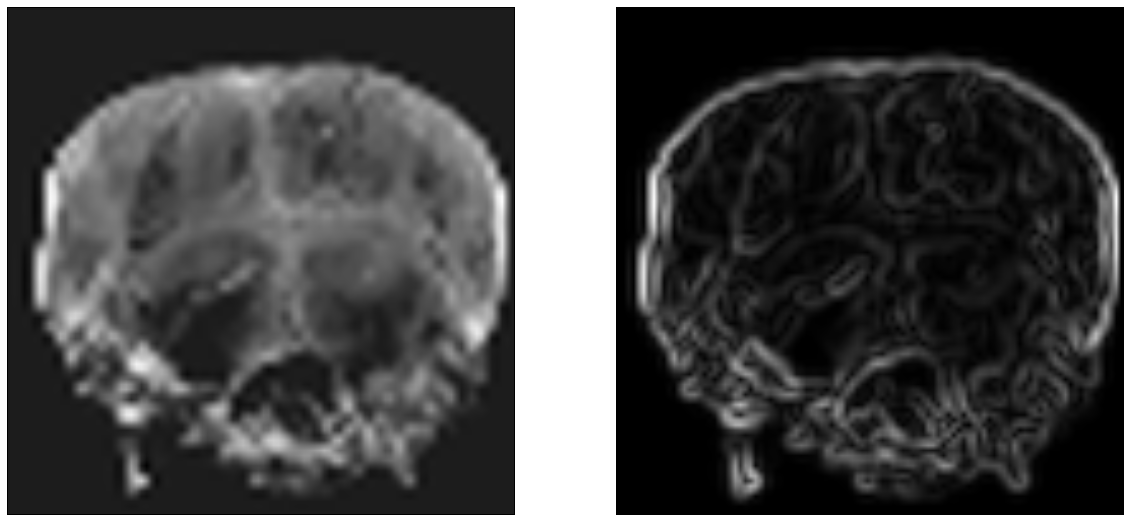

In [4]:
# further reduction by a factor of 2 - simulates medium density seismic acquisition

tut_i0 = tut_r1[::2,::2]
tut_i1 = sp.ndimage.interpolation.zoom(tut_i0, 2, order=2)
edges_i1 = sobel(tut_i1)

print tut_r1.shape

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_i1, cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_i1, cmap='gray')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()

(100L, 100L)


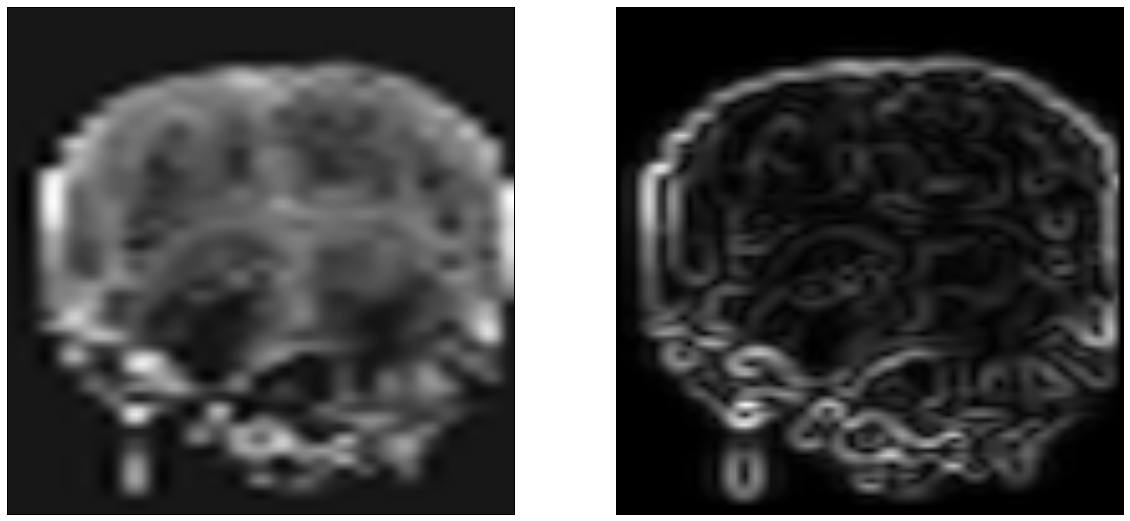

In [5]:
# further reduction by a factor of 2 in one direction and 4 in the other - simulates megabin seismic acquisition
tut_i00 = tut_r1[::2,::4]
tut_i11 = sp.ndimage.interpolation.zoom(tut_i00, (2,4), order=2)
edges_i11 = sobel(tut_i11)

print tut_i11.shape

fig = plt.figure(figsize=(20,20))

ax3 = fig.add_subplot(1, 2, 1)
plt.imshow(tut_i11, cmap='gray')
ax3.set_xticks([])
ax3.set_yticks([])

ax4 = fig.add_subplot(1, 2, 2)
plt.imshow(edges_i11, cmap='gray')
ax4.set_xticks([])
ax4.set_yticks([])

plt.show()